In [ ]:
#Importando bibliotecas e frameworks

import tensorflow as tf     
from tensorflow.keras import layers, models
from tensorflow import keras

import random
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Model

In [ ]:
 #Importando os datasets

diretorio_treino ='./Dataset/Train'    
diretorio_teste = './Dataset/Test'

tam_imagem = (224, 224)
batch_size = 128

ds_treino = tf.keras.utils.image_dataset_from_directory(
    diretorio_treino,
    labels='inferred',
    label_mode='categorical',
    batch_size=batch_size,
    image_size= tam_imagem,
    shuffle=True
)

ds_teste = tf.keras.utils.image_dataset_from_directory(
    diretorio_teste,
    labels='inferred',
    label_mode='categorical',
    batch_size=batch_size,
    image_size= tam_imagem,
    shuffle=True
)

num_classes = len(ds_treino.class_names)

data_augmentation = tf.keras.models.Sequential([ 
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.1),
])

def augment_images(images, labels):
    return data_augmentation(images, training=True), labels

#Novo dataset já com data augmentation

ds_treino_aug = ds_treino.map(      
    augment_images,
    num_parallel_calls=tf.data.AUTOTUNE
)

Found 329 files belonging to 2 classes.
Found 110 files belonging to 2 classes.


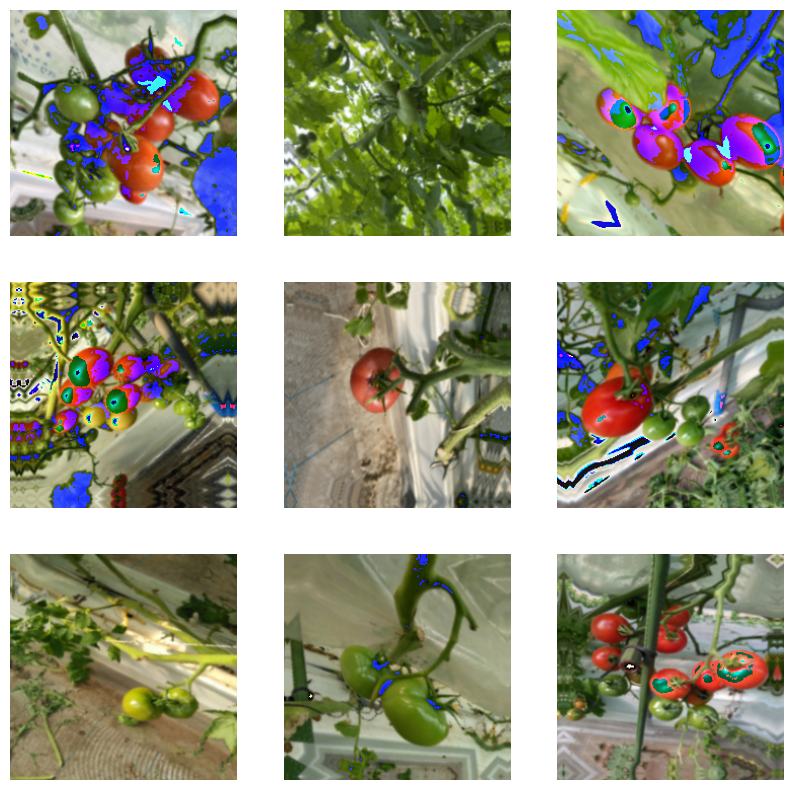

In [ ]:
#Extraindo exemplos de imagens com data augmentation

for images, _ in ds_treino_aug.take(1):   
    plt.figure(figsize=(10, 10))
    for i in range(9):
      image_expanded = tf.expand_dims(images[i], 0)
      augmented_image = data_augmentation(image_expanded, training=True)
      augmented_image = tf.squeeze(augmented_image, 0)
      ax = plt.subplot(3, 3, i + 1)
      plt.imshow(augmented_image.numpy().astype("uint8"))
      plt.axis("off")
    plt.show()

In [ ]:
#Construindo uma rede neural do zero

model_scratch = keras.Sequential()      

print("Input dimensions after preprocessing: ",ds_treino_aug.element_spec[0].shape)

model_scratch.add(keras.Input(shape=(224, 224, 3)))

model_scratch.add(layers.Conv2D(32, (3, 3)))
model_scratch.add(layers.Activation('relu'))
model_scratch.add(layers.MaxPooling2D(pool_size=(2, 2)))

model_scratch.add(layers.Conv2D(32, (3, 3)))
model_scratch.add(layers.Activation('relu'))
model_scratch.add(layers.MaxPooling2D(pool_size=(2, 2)))

model_scratch.add(layers.Dropout(0.25))

model_scratch.add(layers.Conv2D(32, (3, 3)))
model_scratch.add(layers.Activation('relu'))
model_scratch.add(layers.MaxPooling2D(pool_size=(2, 2)))

model_scratch.add(layers.Conv2D(32, (3, 3)))
model_scratch.add(layers.Activation('relu'))
model_scratch.add(layers.MaxPooling2D(pool_size=(2, 2)))

model_scratch.add(layers.Dropout(0.25))

model_scratch.add(layers.Flatten())
model_scratch.add(layers.Dense(256))
model_scratch.add(layers.Activation('relu'))

model_scratch.add(layers.Dropout(0.5))

model_scratch.add(layers.Dense(ds_treino_aug.element_spec[1].shape[1]))
model_scratch.add(layers.Activation('softmax'))

model_scratch.summary()

Input dimensions after preprocessing:  (None, 224, 224, 3)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 activation (Activation)     (None, 222, 222, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      9248      
                                                                 
 activation_1 (Activation)   (None, 109, 109, 32)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 32)       0     

In [ ]:
#Compilando o modelo

model_scratch.compile(loss='categorical_crossentropy',      
              optimizer='adam',
              metrics=['accuracy'])

history = model_scratch.fit(ds_treino_aug,
                    validation_data=ds_teste,
                    batch_size = 128,
                    epochs=20,
)

Epoch 1/20
3/3 [==============================] - 8s 838ms/step - loss: 65.2637 - accuracy: 0.4894 - val_loss: 18.0268 - val_accuracy: 0.5000
Epoch 2/20
3/3 [==============================] - 4s 414ms/step - loss: 17.5366 - accuracy: 0.5015 - val_loss: 1.4075 - val_accuracy: 0.5273
Epoch 3/20
3/3 [==============================] - 4s 410ms/step - loss: 2.8352 - accuracy: 0.5228 - val_loss: 1.3589 - val_accuracy: 0.5727
Epoch 4/20
3/3 [==============================] - 4s 426ms/step - loss: 1.1272 - accuracy: 0.5258 - val_loss: 0.8679 - val_accuracy: 0.5727
Epoch 5/20
3/3 [==============================] - 3s 409ms/step - loss: 0.8212 - accuracy: 0.5593 - val_loss: 0.6632 - val_accuracy: 0.6000
Epoch 6/20
3/3 [==============================] - 4s 408ms/step - loss: 0.7558 - accuracy: 0.5380 - val_loss: 0.6564 - val_accuracy: 0.6455
Epoch 7/20
3/3 [==============================] - 4s 409ms/step - loss: 0.7107 - accuracy: 0.5410 - val_loss: 0.6774 - val_accuracy: 0.6091
Epoch 8/20
3/3 [=

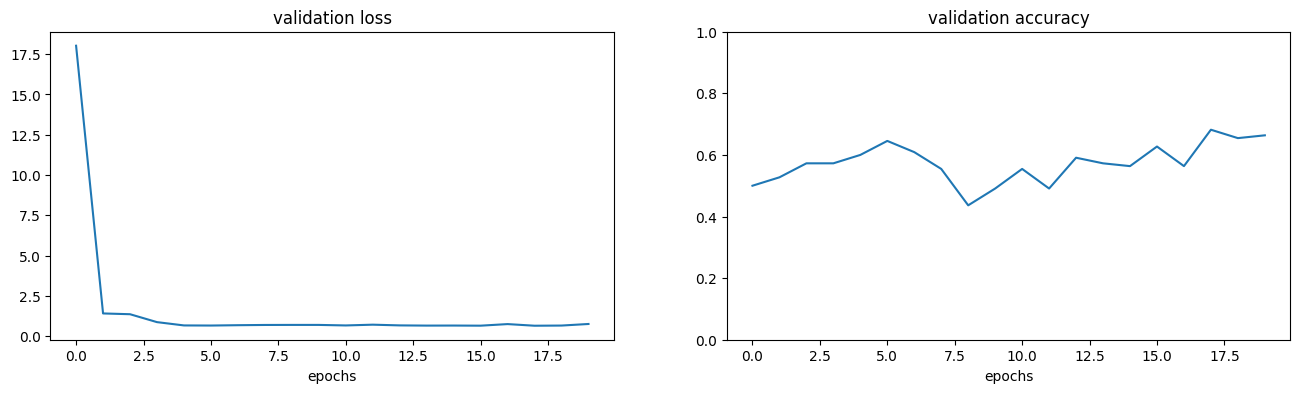

In [6]:
fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(121)
ax.plot(history.history["val_loss"])
ax.set_title("validation loss")
ax.set_xlabel("epochs")

ax2 = fig.add_subplot(122)
ax2.plot(history.history["val_accuracy"])
ax2.set_title("validation accuracy")
ax2.set_xlabel("epochs")
ax2.set_ylim(0, 1)

plt.show()

In [7]:
test_loss, test_accuracy = model_scratch.evaluate(ds_teste, verbose=0)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

Test loss: 0.7528850436210632
Test accuracy: 0.6636363863945007


In [ ]:
#Importei a rede VGG16 sem head e com todas as outras camadas congeladas

vgg = keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
vgg.trainable = False

vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
# Montei minha própria head customizada

inputs = tf.keras.Input(shape=(224, 224, 3))        
x = vgg(inputs, training=False)
x = layers.Flatten()(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.5)(x)

# Fiz uma nova camada de saída com 2 neurônios (meu número de classes)

outputs = layers.Dense(num_classes, activation='softmax')(x)        

 # Criei uma nova rede

model_new = models.Model(inputs, outputs)      

In [10]:
model_new.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model_new.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_2 (Dense)             (None, 128)               3211392   
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 2)                 258       
                                                                 
Total params: 17,926,338
Trainable params: 3,211,650
Non-trai

In [11]:
history2 = model_new.fit(ds_treino_aug,
                    validation_data=ds_teste,
                    batch_size=128,
                    epochs=20,
)

Epoch 1/20
3/3 [==============================] - 12s 3s/step - loss: 26.1218 - accuracy: 0.5714 - val_loss: 12.1792 - val_accuracy: 0.5273
Epoch 2/20
3/3 [==============================] - 4s 576ms/step - loss: 5.4595 - accuracy: 0.6900 - val_loss: 4.6701 - val_accuracy: 0.6545
Epoch 3/20
3/3 [==============================] - 4s 575ms/step - loss: 2.8511 - accuracy: 0.7447 - val_loss: 1.5933 - val_accuracy: 0.7636
Epoch 4/20
3/3 [==============================] - 4s 577ms/step - loss: 1.2438 - accuracy: 0.7903 - val_loss: 1.5843 - val_accuracy: 0.8091
Epoch 5/20
3/3 [==============================] - 4s 573ms/step - loss: 0.5250 - accuracy: 0.8328 - val_loss: 0.7333 - val_accuracy: 0.7636
Epoch 6/20
3/3 [==============================] - 4s 572ms/step - loss: 0.3445 - accuracy: 0.8571 - val_loss: 0.4840 - val_accuracy: 0.7455
Epoch 7/20
3/3 [==============================] - 4s 584ms/step - loss: 0.3764 - accuracy: 0.8571 - val_loss: 0.4492 - val_accuracy: 0.7818
Epoch 8/20
3/3 [====

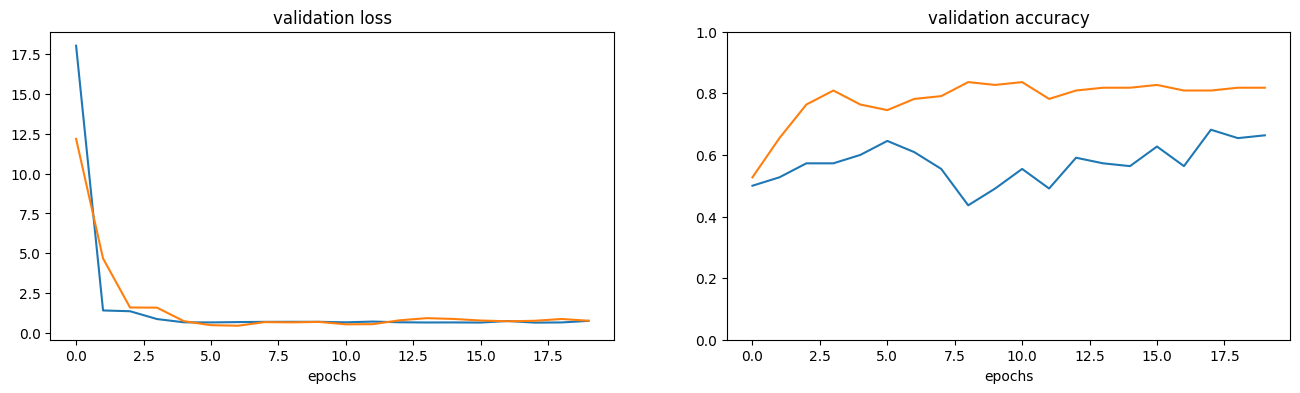

In [12]:
fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(121)
ax.plot(history.history["val_loss"])
ax.plot(history2.history["val_loss"])
ax.set_title("validation loss")
ax.set_xlabel("epochs")

ax2 = fig.add_subplot(122)
ax2.plot(history.history["val_accuracy"])
ax2.plot(history2.history["val_accuracy"])
ax2.set_title("validation accuracy")
ax2.set_xlabel("epochs")
ax2.set_ylim(0, 1)

plt.show()